In [8]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

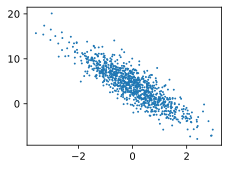

In [9]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [10]:
import random
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

In [11]:
for X, y in data_iter(batch_size=3, features=features, labels=labels):
    print("Batch features:\n", X)
    print("Batch labels:\n", y)

Batch features:
 tensor([[ 0.6116,  2.0368],
        [ 1.0144,  0.7748],
        [ 0.4929, -0.5127]])
Batch labels:
 tensor([[-1.5174],
        [ 3.5936],
        [ 6.9329]])
Batch features:
 tensor([[ 0.3280, -0.0400],
        [ 0.8344,  0.0119],
        [-0.3177,  1.5501]])
Batch labels:
 tensor([[ 4.9990],
        [ 5.8542],
        [-1.7118]])
Batch features:
 tensor([[ 1.5923,  0.7723],
        [-1.0434,  0.1754],
        [-1.0898, -1.2129]])
Batch labels:
 tensor([[4.7471],
        [1.5126],
        [6.1538]])
Batch features:
 tensor([[ 1.1761, -0.0057],
        [-1.1047,  0.9028],
        [ 0.0512,  0.9792]])
Batch labels:
 tensor([[ 6.5703],
        [-1.1033],
        [ 0.9715]])
Batch features:
 tensor([[ 0.1172, -0.3462],
        [-0.9236, -1.1055],
        [ 1.0216, -3.0208]])
Batch labels:
 tensor([[ 5.6157],
        [ 6.1204],
        [16.5101]])
Batch features:
 tensor([[-0.1917, -1.0598],
        [-0.7687,  0.2247],
        [-0.4251,  0.7058]])
Batch labels:
 tensor([[7.

In [12]:
batch_size = 10
for X, y in data_iter(batch_size=batch_size, features=features, labels=labels):
    print(X, '\n', y)
    break

tensor([[-0.9972,  0.7127],
        [ 1.5670, -0.8182],
        [-0.5113, -1.5261],
        [-2.3484,  0.6316],
        [-0.1720, -1.3428],
        [-0.1326, -0.7552],
        [-0.4584, -0.7380],
        [ 0.0108,  0.1255],
        [ 0.2429, -1.7635],
        [-0.5580,  0.0341]]) 
 tensor([[-0.2119],
        [10.1144],
        [ 8.3491],
        [-2.6383],
        [ 8.4312],
        [ 6.5126],
        [ 5.7873],
        [ 3.8019],
        [10.6884],
        [ 2.9630]])


In [16]:
w = torch.normal(0,0.01, size = (2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [17]:
def linreg(X, w,b):
    return torch.matmul(X,w) + b

In [19]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 /2

In [20]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [21]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch:{epoch + 1}, loss:{float(train_l.mean()):f}')

epoch:1, loss:0.034346
epoch:2, loss:0.000125
epoch:3, loss:0.000049


In [23]:
print(f'{true_w - w.reshape(true_w.shape)}')
print(f'{true_b - b}')

tensor([-1.5450e-04, -1.5974e-05], grad_fn=<SubBackward0>)
tensor([6.8665e-05], grad_fn=<RsubBackward1>)
